### Getting data from yann lecunn dataset

Yann Lecunn dataset is of the format idx and split across 4 files
1. train-images.idx3-ubyte : training image set which consists of 60000 images each image is represented by a 28*28 array
2. train-labels.idx1-ubyte : training label set which consists of 60000 labels 
3. t10k-images.idx3-ubyte : test image set which consists of 10000 images each image is represented by a 28*28
4. t10k-labels.idx1-ubyte : training label set which consists of 10000 labels

In [1]:
import idx2numpy
import seaborn as sns

#### Extract Training data

In [2]:
X_train_3D = idx2numpy.convert_from_file('train-images.idx3-ubyte')
X_train = X_train_3D.flatten().reshape(60000,784)

y_train = idx2numpy.convert_from_file('train-labels.idx1-ubyte')
X_train.shape, y_train.shape

((60000, 784), (60000,))

#### Extract Test data

In [3]:
X_test_3D = idx2numpy.convert_from_file('t10k-images.idx3-ubyte')
X_test =  X_test_3D.flatten().reshape(10000,784)

y_test = idx2numpy.convert_from_file('t10k-labels.idx1-ubyte')
X_test.shape, y_test.shape

((10000, 784), (10000,))

# Decision Tree

In [4]:
import numpy as np
from sklearn.utils import shuffle
X_shuffle,y_shuffle = shuffle(X_train,y_train)
X_train = X_shuffle[0:50000]
y_train = y_shuffle[0:50000]

from sklearn import tree
from sklearn.model_selection import cross_val_predict

#dt_clf = tree.DecisionTreeClassifier(max_depth=20, max_leaf_nodes=300)
#dt_clf = tree.DecisionTreeClassifier(max_depth=4, max_leaf_nodes=20)
dt_clf = tree.DecisionTreeClassifier(max_depth=8)

#y_train_pred = cross_val_predict(dt_clf, X_train, y_train, cv=2)
print(dt_clf.fit(X_train, y_train))

print('Number of nodes in the decision tree {}.'.format(dt_clf.tree_.node_count))
print('Number of threshold in the decision tree {}.'.format(len(dt_clf.tree_.threshold)))
print('Number of leaves in the decision tree {}.'.format(dt_clf.tree_.n_leaves))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, dt_clf.predict(X_test)), accuracy_score(y_train, dt_clf.predict(X_train)))

DecisionTreeClassifier(max_depth=8)
Number of nodes in the decision tree 503.
Number of threshold in the decision tree 503.
Number of leaves in the decision tree 252.
0.8224 0.83114


In [5]:
threshold = dt_clf.tree_.threshold
import pandas as pd
df_train = pd.DataFrame(data = X_train, columns = range(X_train[0].shape[0]))
df_test = pd.DataFrame(data = X_test, columns = range(X_test[0].shape[0]))
df_train.shape, df_test.shape
df = pd.concat([df_train, df_test])
unique_vals = []
for i in df.columns:
    unique_vals.append(df[i].unique())
flatten_list = np.concatenate(unique_vals).ravel()
print('Max and Min values of thresholds in decision tree are', max([int(i) for i in list(set(threshold))]), min([int(i) for i in list(set(threshold))]))

Max and Min values of thresholds in decision tree are 253 -2


### Displaying the tree

In [6]:
from sklearn.tree import export_text
text_representation = export_text(dt_clf)
print(text_representation, dt_clf.classes_)

|--- feature_350 <= 126.50
|   |--- feature_568 <= 0.50
|   |   |--- feature_430 <= 0.50
|   |   |   |--- feature_405 <= 0.50
|   |   |   |   |--- feature_484 <= 0.50
|   |   |   |   |   |--- feature_153 <= 1.00
|   |   |   |   |   |   |--- feature_594 <= 21.50
|   |   |   |   |   |   |   |--- feature_156 <= 0.50
|   |   |   |   |   |   |   |   |--- class: 7
|   |   |   |   |   |   |   |--- feature_156 >  0.50
|   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_594 >  21.50
|   |   |   |   |   |   |   |--- feature_435 <= 71.00
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- feature_435 >  71.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |--- feature_153 >  1.00
|   |   |   |   |   |   |--- feature_571 <= 5.00
|   |   |   |   |   |   |   |--- feature_426 <= 10.00
|   |   |   |   |   |   |   |   |--- class: 3
|   |   |   |   |   |   |   |--- feature_426 >  10.00
|   |   |   |   |   |   |   |   |--- class

Number of nodes in the decision tree 503.
Number of threshold in the decision tree 503.
Number of leaves in the decision tree 252.


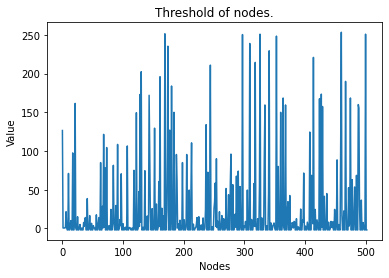

In [7]:
print('Number of nodes in the decision tree {}.'.format(dt_clf.tree_.node_count))
print('Number of threshold in the decision tree {}.'.format(len(dt_clf.tree_.threshold)))
print('Number of leaves in the decision tree {}.'.format(dt_clf.tree_.n_leaves))
import matplotlib.pyplot as plt
plt.plot(dt_clf.tree_.threshold)
plt.xlabel('Nodes')
plt.ylabel('Value')
plt.title('Threshold of nodes.')
plt.show()

### Combinational: Convert into verilog combinational format and save in a text file.

In [9]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def decision_tree_inference({}):".format('feature_set'))
    #for i,pixel in enumerate(feature_names):
    #        print ("{}{}".format("  ", pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if ({} <= {})".format(indent, name, int(round(threshold,3))))  #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else // if {} > {}".format(indent, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label<= {};".format(indent, np.argmax(tree_.value[node][0],axis=0)))

    recurse(0, 1)

cols = range(784)
features = ['pixels[{}]'.format(str(i)) for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_mnist_decision_tree_comb_inference.py', 'w') as f:
    f.write(cap.stdout)

### OPE Encryption  https://github.com/tonyo/pyope

In [10]:
#OPE_ciphers = {0: 12066, 1: 169498, 2: 226543, 3: 672042, 4: 838658, 5: 919684, 6: 977270, 7: 1055701, 8: 1058312, 9: 1087796, 10: 1097445, 11: 1176451, 12: 1183921, 13: 1220952, 14: 1557525, 15: 1727241, 16: 1892922, 17: 1960170, 18: 1966351, 19: 2025917, 20: 2086019, 21: 2186547, 22: 2240207, 23: 2247658, 24: 2262361, 25: 2322390, 26: 2400481, 27: 2456156, 28: 2492957, 29: 2566854, 30: 2641406, 31: 2654827, 32: 2657422, 33: 2673702, 34: 2710579, 35: 2896614, 36: 2970776, 37: 3006623, 38: 3015638, 39: 3041948, 40: 3127827, 41: 3150608, 42: 3187553, 43: 3216337, 44: 3344121, 45: 3442649, 46: 3511024, 47: 3594918, 48: 3655763, 49: 3672413, 50: 4035862, 51: 4081037, 52: 4104042, 53: 4152186, 54: 4163483, 55: 4180647, 56: 4246894, 57: 4351195, 58: 4429184, 59: 4549356, 60: 4607063, 61: 4639927, 62: 4782698, 63: 4788482, 64: 4837431, 65: 4864153, 66: 5118423, 67: 5261392, 68: 5299828, 69: 5367820, 70: 5389522, 71: 5404390, 72: 5440993, 73: 5521457, 74: 5571806, 75: 5576710, 76: 5603955, 77: 5623693, 78: 5687500, 79: 5784075, 80: 5801917, 81: 5815677, 82: 5860302, 83: 5895894, 84: 5910480, 85: 5962880, 86: 5987354, 87: 6025885, 88: 6031446, 89: 6045911, 90: 6214893, 91: 6269128, 92: 6320478, 93: 6325746, 94: 6358493, 95: 6382120, 96: 6414249, 97: 6469510, 98: 6517938, 99: 6553015, 100: 6586802, 101: 6657083, 102: 6766826, 103: 6824707, 104: 6851836, 105: 6887293, 106: 6901880, 107: 6922412, 108: 6945741, 109: 7088186, 110: 7169022, 111: 7387426, 112: 7498208, 113: 7574683, 114: 7877256, 115: 7990376, 116: 8014774, 117: 8247426, 118: 8310828, 119: 8348065, 120: 8420586, 121: 8447951, 122: 8484928, 123: 8573440, 124: 8592862, 125: 8606928, 126: 8675181, 127: 8693099, 128: 8800638, 129: 8817217, 130: 8874431, 131: 8883869, 132: 8920338, 133: 8942168, 134: 8959790, 135: 8966065, 136: 9099182, 137: 9115343, 138: 9201113, 139: 9268521, 140: 9307567, 141: 9345791, 142: 9375555, 143: 9377486, 144: 9394318, 145: 9398866, 146: 9458713, 147: 9541748, 148: 9619426, 149: 9676186, 150: 9715339, 151: 9757607, 152: 9804769, 153: 9857918, 154: 9891099, 155: 9903648, 156: 10010619, 157: 10038400, 158: 10138825, 159: 10168981, 160: 10275301, 161: 10385488, 162: 10486337, 163: 10487008, 164: 10620586, 165: 10655005, 166: 10680653, 167: 10694574, 168: 10724530, 169: 10779532, 170: 10828196, 171: 10830169, 172: 10848005, 173: 10876729, 174: 10926801, 175: 10954040, 176: 10976026, 177: 10977614, 178: 11056348, 179: 11250015, 180: 11302657, 181: 11315752, 182: 11460622, 183: 11536965, 184: 11572194, 185: 11677613, 186: 11698564, 187: 11743495, 188: 11783171, 189: 11911512, 190: 11937653, 191: 11947496, 192: 11976429, 193: 12012962, 194: 12031102, 195: 12109032, 196: 12238082, 197: 12280297, 198: 12295705, 199: 12377556, 200: 12388676, 201: 12476849, 202: 12502820, 203: 12576668, 204: 12630390, 205: 12698018, 206: 12724395, 207: 12777658, 208: 12876195, 209: 12960605, 210: 12993132, 211: 13034518, 212: 13225130, 213: 13251178, 214: 13278072, 215: 13425223, 216: 13577682, 217: 13650047, 218: 13760126, 219: 13867767, 220: 13949008, 221: 14074481, 222: 14138661, 223: 14156903, 224: 14327531, 225: 14364236, 226: 14391815, 227: 14533063, 228: 14584445, 229: 14692083, 230: 14727026, 231: 14785119, 232: 14850983, 233: 14965647, 234: 15038435, 235: 15059755, 236: 15207521, 237: 15280679, 238: 15305829, 239: 15337248, 240: 15415187, 241: 15423422, 242: 15551713, 243: 15791922, 244: 15802191, 245: 15861718, 246: 16000222, 247: 16069522, 248: 16267485, 249: 16306400, 250: 16537043, 251: 16637700, 252: 16730424, 253: 17031859, 254: 17167896, 255: 17228611}
import pdb
unique_thresholds = list(set([int(round(i,3)) for i in threshold]))
print(f'Min value of threshold = {min(unique_thresholds)}. Max value of threshold = {max(unique_thresholds)}')
print('Unique values in thresholds are: ', unique_thresholds)
from pyope.ope import OPE, ValueRange
#random_key = OPE.generate_key()
cipher = OPE(b'long key' * 2, in_range=ValueRange(-100, 1000),
                              out_range=ValueRange(0, 100000000))
OPE_ciphers = {}
all_plaintexts = list( set(unique_thresholds).union(set(range(256))) ) #Taking all the thresholds and pixels values
all_plaintexts.sort()
for i in all_plaintexts:
    OPE_ciphers[i] = cipher.encrypt(i)

    
flag = 0
ciphers_indecimal_copy = list(OPE_ciphers.values())[:]
ciphers_indecimal_copy.sort()
if (ciphers_indecimal_copy == list(OPE_ciphers.values())):
    flag = 1
     
# printing result
if (flag) :
    print ("Yes, ciphers are sorted. OPE valid.")
else :
    print ("No, ciphers are not sorted. OPE invalid.")

Min value of threshold = -2. Max value of threshold = 253
Unique values in thresholds are:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 28, 29, 31, 34, 36, 38, 41, 42, 43, 45, 46, 47, 49, 51, 52, 53, 54, 56, 58, 60, 63, 67, 68, 70, 71, 72, 74, 75, 78, 80, 81, 85, 88, 90, 93, 95, 96, 97, 104, 106, 108, 110, 114, 121, 124, 126, 127, 129, 134, 149, 150, 155, 157, 159, 160, 161, 167, 168, 172, 173, 184, 190, 196, 202, 211, 214, 221, 229, 235, 239, 248, 250, 251, 253, -2]
Yes, ciphers are sorted. OPE valid.


In [11]:
print(f'Key Display\n In string: {cipher.generate_key().decode()} \n In Hex: {cipher.generate_key().hex()} \n In integer: {int(cipher.generate_key().hex(), base=16)}')
print(OPE_ciphers)

Key Display
 In string: +/yjnqevOrjI/7yX/3ZFsJpsGSZtP1yQWvNahLpZsmg= 
 In Hex: 71776f576730312f4b47374c4b70532b535572626c4a7a2b7a4b59705a552f57426b6b503047706c3930343d 
 In integer: 1878788862557908227137565692063987391305633215182691649822872904684955143371642294410571613689477623067709
{-2: 9913043, 0: 10051064, 1: 10110880, 2: 10178451, 3: 10239092, 4: 10256163, 5: 10311743, 6: 10428057, 7: 10459335, 8: 10495495, 9: 10621710, 10: 10645813, 11: 10700220, 12: 10708006, 13: 10738547, 14: 10810050, 15: 10847584, 16: 10957410, 17: 10964188, 18: 11365368, 19: 11588596, 20: 11667110, 21: 11763668, 22: 11885383, 23: 12053585, 24: 12113758, 25: 12161483, 26: 12207861, 27: 12220718, 28: 12228678, 29: 12411484, 30: 12880615, 31: 12908743, 32: 12953385, 33: 13090980, 34: 13115331, 35: 13178136, 36: 13229076, 37: 13242460, 38: 13330733, 39: 13419802, 40: 13445220, 41: 13490312, 42: 13636489, 43: 13677650, 44: 13759948, 45: 13869191, 46: 13873290, 47: 13978160, 48: 13999815, 49: 14003727, 50: 142

### Encrypted: Combinational for OPE

In [25]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    #print ("def decisionTree_EncInference({}):".format('feature_set'))
    #for i,pixel in enumerate(feature_names):
    #        print ("{}{}".format("  ", + pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if ({} <= 32'd{})".format(indent, name, OPE_ciphers[int(round(threshold,3))]))     #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else  // if {} > {}".format(indent, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label <= 32'd{};".format(indent, OPE_ciphers[np.argmax(tree_.value[node][0],axis=0)]))

    recurse(0, 1)

cols = range(784)
features = ['Encrypted_pixels['+str(i)+']' for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_mnist_decision_tree_encrypted_combOPE_inference.py', 'w') as f:
    f.write(cap.stdout)

### ORE Encryption  https://github.com/kevinlewi/fastore

##### Run the code in C and capture the log file, the steps of command are: 
##### cd fastore or cd fastore_backup,  make, ./tests/test_ore >runlog.txt,  cp runlog.txt  ../decision-tree-python/
##### Then execute the following cell.

In [14]:
with open('runlog.txt') as f:
    lines = f.readlines()
logs = [] 
ciphers = []
ciphers_inbinary = []
ciphers_indecimal = []
for line in lines:
    if ('The value of ctxt1 is' in line):
        logs.append(line.split(":")[-1].strip().split('\t'))
        
for log in logs:
    ciphers.append([int(i.strip()) for i in log])
    
for cipher in ciphers:
    ciphers_inbinary.append('0b' + ''.join([format(i, '#010b') for i in cipher]).replace('0b', ''))
    
for cipher in ciphers_inbinary:
    ciphers_indecimal.append(int(cipher,2))
    
flag = 0
ciphers_indecimal_copy = ciphers_indecimal[:]
ciphers_indecimal_copy.sort()
if (ciphers_indecimal_copy == ciphers_indecimal):
    flag = 1
     
# printing result
if (flag) :
    print ("Yes, ciphers are sorted. OPE valid.")
else :
    print ("No, ciphers are not sorted. OPE invalid.")

Yes, ciphers are sorted. OPE valid.


In [15]:
# Taking care of threshold -2 because negative number os not supported in the current state of the C source code.
# Need time in modification of the source code to accept negative number. 
ORE_ciphers = {}
for i in range(256):
    ORE_ciphers[i] = ciphers_indecimal[i]
ORE_ciphers[-2] = ciphers_indecimal[0] - 2
print(ORE_ciphers)

{0: 1947311906027263828, 1: 1947311906027263829, 2: 1947311906027264153, 3: 1947311906027264154, 4: 1947311906027300018, 5: 1947311906027300019, 6: 1947311906027300285, 7: 1947311906027300286, 8: 1947311906034816716, 9: 1947311906034816717, 10: 1947311906034816771, 11: 1947311906034816772, 12: 1947311906034910688, 13: 1947311906034910689, 14: 1947311906034910952, 15: 1947311906034910953, 16: 1947311910682477158, 17: 1947311910682477159, 18: 1947311910682477329, 19: 1947311910682477330, 20: 1947311910682499520, 21: 1947311910682499521, 22: 1947311910682499601, 23: 1947311910682499602, 24: 1947311910712852573, 25: 1947311910712852574, 26: 1947311910712852903, 27: 1947311910712852904, 28: 1947311910712940612, 29: 1947311910712940613, 30: 1947311910712940936, 31: 1947311910712940937, 32: 1947313091088268296, 33: 1947313091088268297, 34: 1947313091088268560, 35: 1947313091088268561, 36: 1947313091088324359, 37: 1947313091088324360, 38: 1947313091088324716, 39: 1947313091088324717, 40: 19473

### Encrypted: Combinational Generator for ORE

In [19]:
%%capture cap --no-stderr
#https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def decisionTree_EncInference({}):".format('feature_set'))
    #for i,pixel in enumerate(feature_names):
    #        print ("{}{}".format("  ", + pixel+'='+'feature_set['+str(i)+']'))
    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if ({} <= 64'd{})".format(indent, name, ORE_ciphers[int(round(threshold,3))]))     #convert the threshold to integer
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else  // if {} > {}".format(indent, name, int(round(threshold,3))))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{} Label <= 64'd{};".format(indent, ORE_ciphers[np.argmax(tree_.value[node][0],axis=0)]))

    recurse(0, 1)

cols = range(784)
features = ['Encrypted_pixels['+str(i)+']' for i in cols]
class_names = [str(i) for i in dt_clf.classes_]
tree_to_code(dt_clf, features)

with open('verilog_mnist_decision_tree_encrypted_combORE_inference.py', 'w') as f:
    f.write(cap.stdout)